In [1]:
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: rapidfuzz
    Found existing installation: rapidfuzz 3.0.0
    Uninstalling rapidfuzz-3.0.0:
      Successfully uninstalled rapidfuzz-3.0.0


In [2]:
!pip install pydub

In [3]:
!pip install --upgrade AudioConverter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.1.3
    Uninstalling click-8.1.3:
      Successfully uninstalled click-8.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 23.4.1 requires cupy-cuda11x<12.0.0a0,>=9.5.0, which is not installed.
flask 2.3.2 requires click>=8.1.3, but you have click 7.1.2 which is incompatible.
dask 2023.5.0 requires click>=8.0, but you have click 7.1.2 which is incompatible.
dask-cuda 23.4.0 requires dask==2023.3.2, but you have dask 2023.5.0 which is incompatible.
dask-cudf 23.4.1 requires dask==2023.3.2, but you have dask 2023.5.0 which is incompatible.
distributed 2023.3.2.1 requires click>=8.0, but you have click 7.1.2 which is incompatible.
distributed 2023.3.2.1 requires dask==2023.3.2, but you have dask 2023.5.0

In [4]:
import pandas as pd
import numpy as np
import zipfile
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from IPython import display
from jiwer import wer

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
# for i in range(10):
#   !wget --no-check-certificate \
#       "https://www.openslr.org/resources/36/asr_sundanese_{i}.zip" \
#       -O "/tmp/asr_sundanese_{i}.zip"

#   local_zip = f'/tmp/asr_sundanese_{i}.zip'
#   zip_ref   = zipfile.ZipFile(local_zip, 'r')
#   zip_ref.extractall('/tmp')
#   zip_ref.close()

In [5]:
!wget --no-check-certificate \
      "https://www.openslr.org/resources/36/utt_spk_text.tsv" \
      -O "/tmp/utt_spk_text.tsv"

--2023-06-03 06:19:13--  https://www.openslr.org/resources/36/utt_spk_text.tsv
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://us.openslr.org/resources/36/utt_spk_text.tsv [following]
--2023-06-03 06:19:14--  http://us.openslr.org/resources/36/utt_spk_text.tsv
Resolving us.openslr.org (us.openslr.org)... 46.101.158.64
Connecting to us.openslr.org (us.openslr.org)|46.101.158.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15662045 (15M) [text/tab-separated-values]
Saving to: ‘/tmp/utt_spk_text.tsv’

/tmp/utt_spk_text.t 100%[===================>]  14.94M  11.5MB/s    in 1.3s    

2023-06-03 06:19:16 (11.5 MB/s) - ‘/tmp/utt_spk_text.tsv’ saved [15662045/15662045]



In [26]:
wavs_path = "/kaggle/input/dataset-asr-sundanese/tmp/asr_sundanese/wavs/tmp/asr_sundanese/wavs/"
metadata_path = "/kaggle/input/metadata/utt_spk_text.tsv"

In [ ]:
# os.mkdir('/tmp/asr_sundanese/wavs/')

In [ ]:
# wavs_path = "/tmp/asr_sundanese/wavs/"

In [27]:
labels = os.listdir(wavs_path)
# print(labels)
print(len(labels))

136863


In [ ]:
# no_of_recordings=[]
# for label in labels:
#     waves = [f for f in os.listdir(flacs_path + '/'+ label) if f.endswith('.flac')]
#     no_of_recordings.append(len(waves))
    
# plt.figure(figsize=(30,5))
# index = np.arange(len(labels))
# plt.bar(index, no_of_recordings)
# plt.xlabel('Commands', fontsize=12)
# plt.ylabel('No of recordings', fontsize=12)
# plt.xticks(index, labels, fontsize=15, rotation=60)
# plt.title('No. of recordings for each command')
# plt.show()

In [ ]:
# sum(no_of_recordings)

## Convert .flac to .wav

In [ ]:
# for label in labels:
#     !audioconvert convert "/tmp/asr_sundanese/data/{label}/" "/tmp/asr_sundanese/wavs/" --output-format .wav

In [16]:
metadata_df = pd.read_csv(metadata_path, sep="\t", header=None, quoting=3)
metadata_df = metadata_df[:len(labels)]
metadata_df.tail(10)

,0,1,2
136853,9ffb52a61b,0dc09,Nabila Syakieb olohok ningali Oh Ha Young keur...
136854,9ffbc209eb,55370,Joe Taslim jeung Dev Joshi keur dipoto ku wart...
136855,9ffbe49c6c,25275,Wahyu Rudi Astadi olohok ningali Adriana Lima ...
136856,9ffde5ca3d,de998,Tio Pakusadewo olohok ningali Ko Hyun Jung keu...
136857,9ffe81542e,c045e,Muhamad Farhan olohok ningali Brad Pitt keur d...
136858,9ffe958d87,ccf37,Katon Bagaskara olohok ningali My Chemical Rom...
136859,9ffef6920b,82b75,Tara Basro jeung Shania Twain keur dipoto ku w...
136860,9fff321983,685d2,Lilis Karlina olohok ningali Lady Gaga keur di...
136861,9fffa59f69,82b75,Muhamad Farhan olohok ningali Olivia Munn keur...
136862,9fffa862d2,cce81,Yayan Ruhlan olohok ningali Ashley Tisdale keu...


In [17]:
metadata_df.columns = ["file_id", "user_id", "transcription"]
metadata_df = metadata_df[["file_id", "transcription"]]
metadata_df = metadata_df.sample(frac=1).reset_index(drop=True)

In [20]:
split = int(len(metadata_df) * 0.90)
df_train = metadata_df[:split]
df_val = metadata_df[split:]

print(f"Size of the training set: {len(df_train)}")
print(f"Size of the validation set: {len(df_val)}")

Size of the training set: 123176
Size of the validation set: 13687


In [21]:
# The set of characters accepted in the transcription
characters = [x for x in "abcdefghijklmnopqrstuvwxyz'?! "]

# Mapping characters to integers
char_to_num = keras.layers.StringLookup(vocabulary=characters, oov_token="")

# Mapping integers back to original characters
num_to_char = keras.layers.StringLookup(
                    vocabulary=char_to_num.get_vocabulary(),
                    oov_token="",
                    invert=True)

print(f"The vocabulary is: {char_to_num.get_vocabulary()}")
print(f"Size: {char_to_num.vocabulary_size()}")

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', ' ']
Size: 31


In [22]:
char_to_num

## Process the audio


In [28]:
frame_length = 256
frame_step = 160
fft_length = 384

def encode_single_sample(wav_file, label):
    # Read wav file
    file = tf.io.read_file(wavs_path + wav_file + ".wav")
    
    # Decode the wav file
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    
    # Change type to float
    audio = tf.cast(audio, tf.float32)
    
    # Get the spectogram
    spectogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    
    # Only need the magnitude
    spectogram = tf.abs(spectogram)
    spectogram = tf.math.pow(spectogram, 0.5)
    
    # Normalization
    means = tf.math.reduce_mean(spectogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectogram, 1, keepdims=True)
    spectogram = (spectogram - means) / (stddevs + 1e-10)
    
    # Convert the label to lower case
    label = tf.strings.lower(label)
    
    # Split the label
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    
    # Map the characters in label to number
    label = char_to_num(label)
    
    return spectogram, label

## Creating dataset objects

In [29]:
batch_size = 32
# Define the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_train["file_id"]), list(df_train["transcription"]))
)

train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Define the validation dataset
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["file_id"]), list(df_val["transcription"]))
)

validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

## Visualize the data

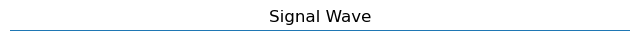

In [30]:
fig = plt.figure(figsize=(8, 5))
for batch in train_dataset.take(1):
    spectogram = batch[0][0].numpy()
    spectogram = np.array([np.trim_zeros(x) for x in np.transpose(spectogram)])
    label = batch[1][0]
    
    # Spectogram
    label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
    ax = plt.subplot(2, 1, 1)
    ax.imshow(spectogram, vmax=1)
    ax.set_title(label)
    ax.axis("off")
    
    # Wav
    file = tf.io.read_file(wavs_path + list(df_train["file_id"])[0] + ".wav")
    audio, _ = tf.audio.decode_wav(file)
    audio = audio.numpy()
    ax = plt.subplot(2, 1, 1)
    plt.plot(audio)
    ax.set_title("Signal Wave")
    ax.set_xlim(0, len(audio))
    display.display(display.Audio(np.transpose(audio), rate=16000))
plt.show()

## Loss Function

In [31]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")
    
    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    
    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss


## Build Model

In [32]:
def build_model(input_dim, output_dim, rnn_layers=5, rnn_units=128):
    # Models input
    input_spectogram = layers.Input((None, input_dim), name="input")
    
    # Expand the dimension to use 2D CNN
    x = layers.Reshape((-1, input_dim, 1), name="expand_dim")(input_spectogram)
    
    # Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 41],
        strides=[2, 2],
        padding="same",
        use_bias=False,
        name="conv_1",
        )(x)
    x = layers.BatchNormalization(name="conv_1_bn")(x)
    x = layers.ReLU(name="conv_1_relu")(x)
    
    # Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1, 2],
        padding="same",
        use_bias=False,
        name="conv_2",
        )(x)
    x = layers.BatchNormalization(name="conv_2_bn")(x)
    x = layers.ReLU(name="conv_2_relu")(x)
    
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    
    # RNN layers
    for i in range(1, rnn_layers + 1):
        recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            return_sequences=True,
            reset_after=True,
            name=f"gru_{i}",
        )
        x = layers.Bidirectional(
            recurrent, name=f"bidirectional_{i}", merge_mode="concat"
        )(x)
        if i < rnn_layers:
            x = layers.Dropout(rate=0.5)(x)
        
    # Dense layer
    x = layers.Dense(units=rnn_units * 2, name="dense_1")(x)
    x = layers.ReLU(name="dense_1_relu")(x)
    x = layers.Dropout(rate=0.5)(x)
    
    # Classification layer
    output = layers.Dense(units=output_dim + 1, activation="softmax")(x)
    
    # Model
    model = keras.Model(input_spectogram, output, name="DeepSpeech_2")
    
    # Optimizer
    opt = keras.optimizers.Adam(learning_rate=1e-4)
    
    # Compile the model and return
    model.compile(optimizer=opt, loss=CTCLoss)
    
    return model

In [33]:
model = build_model(
    input_dim=fft_length // 2 + 1,
    output_dim=char_to_num.vocabulary_size(),
    rnn_units=512,
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input (InputLayer)                              [(None, None, 193)]                         0                
                                                                                                              
 expand_dim (Reshape)                            (None, None, 193, 1)                        0                
                                                                                                              
 conv_1 (Conv2D)                                 (None, None, 97, 32)                        14432            
                                                                                                              
 conv_1_bn (BatchNormalization)                  (None, None, 97, 32)                     

## Training and Evaluating

In [34]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        output_text.append(result)
    return output_text

In [35]:
class CallbackEval(keras.callbacks.Callback):
    def __init__(self, dataset):
        super().__init__()
        self.dataset = dataset
        
    def on_epoch_end(self, epoch: int, logs=None):
        predictions = []
        targets = []
        for batch in self.dataset:
            X, y = batch
            batch_predictions = model.predict(X)
            batch_predictions = decode_batch_predictions(batch_predictions)
            predictions.extend(batch_predictions)
            for label in y:
                label = (
                    tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
                )
                targets.append(label)
        wer_score = wer(targets, predictions)
        print("-" * 100)
        print(f"Word Error Rate: {wer_score:.4f}")
        print("-" * 100)
        for i in np.random.randint(0, len(predictions), 2):
            print(f"Target: {targets[i]}")
            print(f"Predictions: {predictions[i]}")
            print("-" * 100)

In [ ]:
epochs = 5
validation_callback = CallbackEval(validation_dataset)
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[validation_callback],
)

Epoch 1/5
1/1 [==============================] - 3s 3s/step
----------------------------------------------------------------------------------------------------
Word Error Rate: 0.4963
----------------------------------------------------------------------------------------------------
Target: muhamad kautsar hikmat olohok ningali kylie minogue keur diwawancara
Predictions: muhama to zahima olohok ningali al mina keur diwawancara
----------------------------------------------------------------------------------------------------
Target: pun lanceuk hoyong angkat ka bangor
Predictions: ponlan jeng hayo manta kaboban habama
----------------------------------------------------------------------------------------------------
3850/3850 [==============================] - 9064s 2s/step - loss: 84.7108 - val_loss: 41.6935
Epoch 2/5
1/1 [==============================] - 0s 271ms/step
----------------------------------------------------------------------------------------------------
Word Error 

## Predict

In [ ]:
predictions = []
targets = []
for batch in validation_dataset:
    X, y = batch
    batch_predictions = model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions)
    predictions.extend(batch_predictions)
    for label in y:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        targets.append(label)
wer_score = wer(targets, predictions)
print("-" * 100)
print(f"Word Error Rate: {wer_score:.4f}")
print("-" * 100)
for i in np.random.randint(0, len(predictions), 2):
    print(f"Target: {targets[i]}")
    print(f"Predictions: {predictions[i]}")
    print("-" * 100)

In [ ]:
def preprocess_audio(file_path):
    # Read audio file
    audio, _ = tf.audio.decode_wav(tf.io.read_file(file_path))
    audio = tf.squeeze(audio, axis=-1)
    audio = tf.cast(audio, tf.float32)

    # Define preprocessing parameters
    frame_length = 256
    frame_step = 160
    fft_length = 384

    # Get the spectrogram
    spectrogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )

    # Compute magnitude
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)

    # Normalization
    means = tf.math.reduce_mean(spectrogram, axis=1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, axis=1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)

    return spectrogram

In [ ]:
def predict_from_file(file_path, model):
    # Preprocess audio
    preprocessed_audio = preprocess_audio(file_path)

    # Expand dimensions to match model input shape
    preprocessed_audio = np.expand_dims(preprocessed_audio, axis=0)

    # Make prediction
    predictions = model.predict(preprocessed_audio)

    # Decode predictions
    decoded_predictions = decode_batch_predictions(predictions)[0]

    return decoded_predictions

In [ ]:
os.listdir("/tmp/asr_sundanese")

In [ ]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [ ]:
download_file('/tmp/asr_sundanese/wavs.zip', 'wavs')

In [ ]:
!zip -r /tmp/asr_sundanese/wavs.zip /tmp/asr_sundanese/wavs